### Importing all required packages

In [9]:
import gmplot
import pandas as pd
import xlrd
import IPython

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
%matplotlib notebook


import requests
import googlemaps
from datetime import datetime
import gmaps

### Setting API Key

In [3]:
apikey = ''

### Loading Data 

In [4]:
emp_data = pd.read_excel('/Users/tazeenmunnavar/MIS 587: BI Project/Data/emp_85716_85719.xlsx')
emp_data.head(5)

list(emp_data.columns)

['id',
 'Street',
 'City',
 'State',
 'ZipCode',
 'BUILDING_NAME',
 'DEPT_ID',
 'DEPT_NAME',
 'Lat/Long',
 'Latitude',
 'Longitude']

In [5]:
latitudes = emp_data['Latitude']
longitudes = emp_data['Longitude']

In [6]:
# Load Map - lat/long here is the center of the map for now & 14 is the zoom level
gmap = gmplot.GoogleMapPlotter(32.232570, -110.951930, 14, apikey)

In [17]:
gmap.scatter(latitudes, longitudes, '#3B0B39', size=40, marker=False)
gmap.draw("gmplot-scatter-top9-zips_85716-85719.html")

#IPython.display.HTML(filename='gmplot-scatter-top9-zips_85716-85719.html')

In [24]:
from IPython.display import IFrame

IFrame(src='./gmplot-scatter-top9-zips_85716-85719.html', width=700, height=600)

# Kmeans Algorithm

In [25]:
emp_subset = emp_data.loc[:,['id','Latitude','Longitude']]
emp_subset.head(5)

,id,Latitude,Longitude
0,1399833,31.955892,-110.767984
1,1403543,31.955892,-110.767984
2,1388974,32.117711,-110.945735
3,1390194,32.181449,-110.964797
4,1419094,32.184732,-110.874504


In [26]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = emp_data[['Latitude']]
X_axis = emp_data[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

<IPython.core.display.Javascript object>


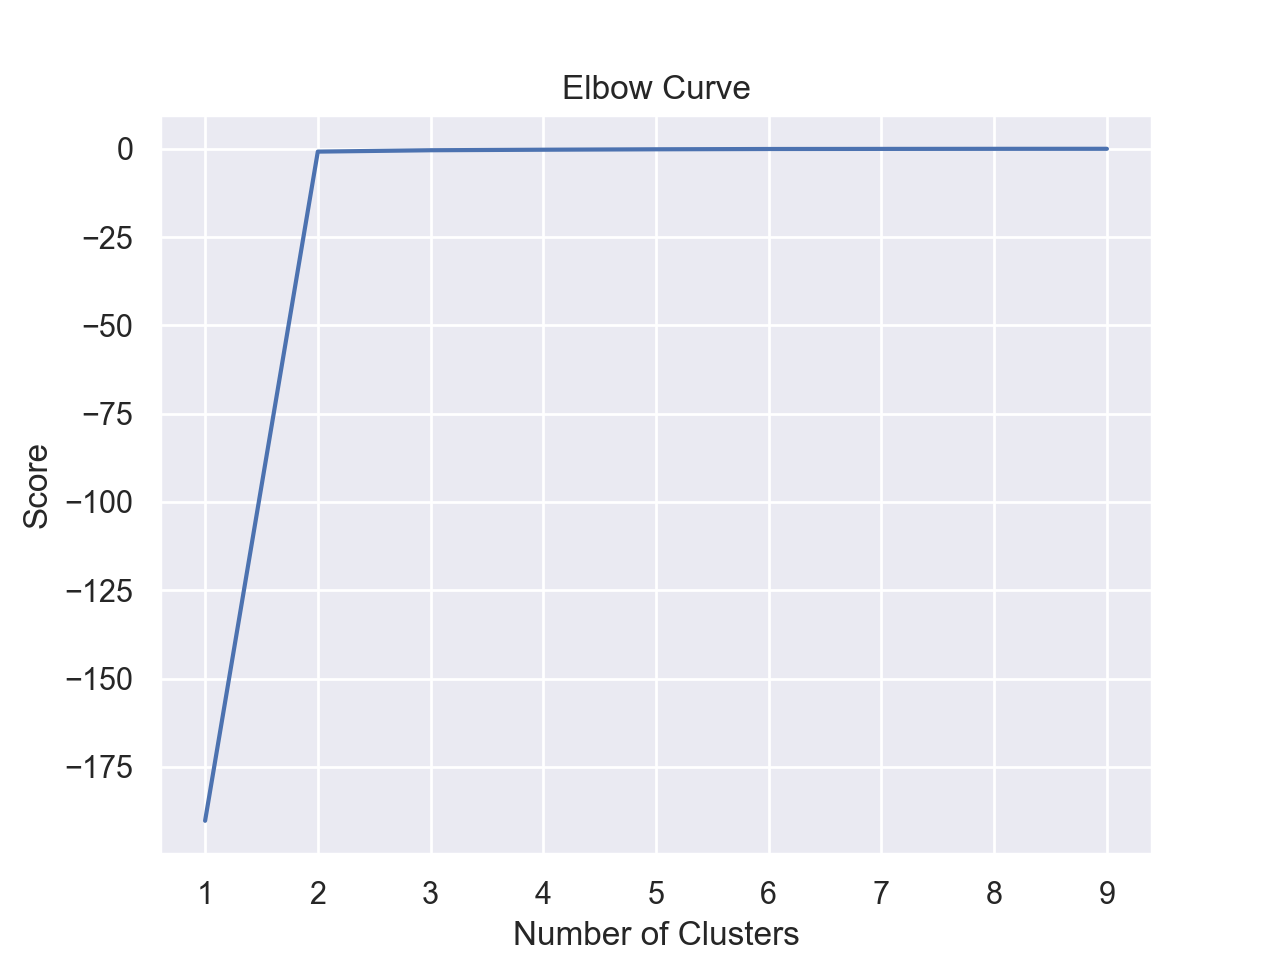

In [27]:
# Elbow Plot
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [29]:
kmeans = KMeans(n_clusters = 6, init ='k-means++')

# Compute k-means clustering. 
kmeans.fit(emp_subset[emp_subset.columns[1:3]])

emp_subset['cluster_label'] = kmeans.fit_predict(emp_subset[emp_subset.columns[1:3]])

# Coordinates of cluster centers.
centers = kmeans.cluster_centers_ 
print('Centers: {0}'.format(centers))

# Labels of each point
labels = kmeans.predict(emp_subset[emp_subset.columns[1:3]]) 
# print (emp_subset)
#emp_subset.head(10)

Centers: [[  32.22629346 -110.94377616]
 [  39.23427     -94.724985  ]
 [  38.833654    -77.641816  ]
 [  31.9558918  -110.7679842 ]
 [  32.26161838 -110.94428476]
 [  32.23897662 -110.91829031]]


<IPython.core.display.Javascript object>


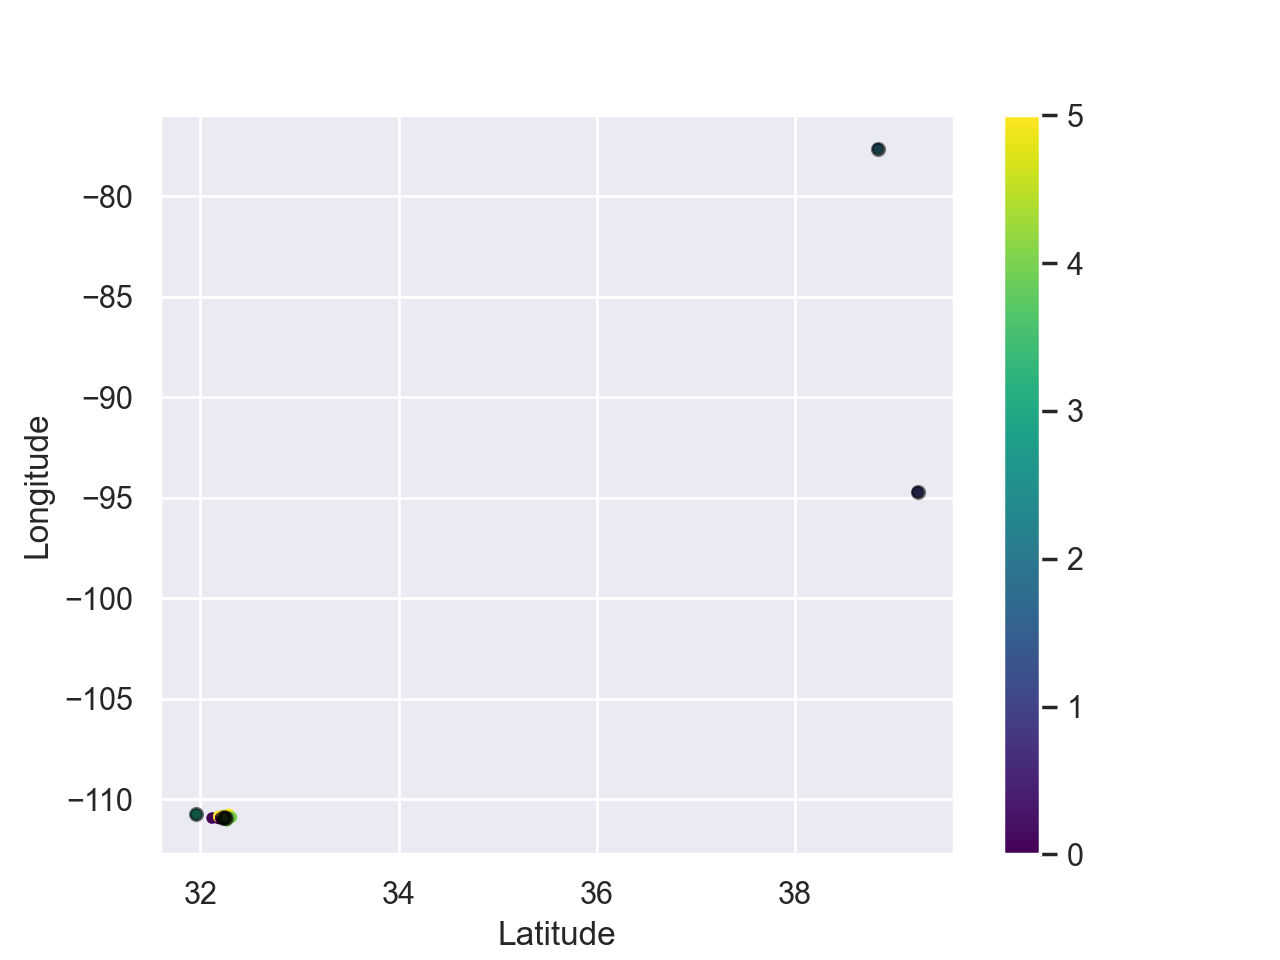

In [30]:
emp_subset.plot.scatter(x = 'Latitude', y = 'Longitude', c = labels, s = 10, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, alpha=0.5)

In [31]:
emp_data.head(5)

,id,Street,City,State,ZipCode,BUILDING_NAME,DEPT_ID,DEPT_NAME,Lat/Long,Latitude,Longitude
0,1399833,2938 E Monte Vista,Tucson,AZ,85716,Bear Down Gymnasium,8102,Admissions and New Student Enrollment,"31.9558918,-110.7679842",31.955892,-110.767984
1,1403543,2551 East Monte Vista Street,Tucson,AZ,85716,ENR2,3008,School of Geography and Development,"31.9558918,-110.7679842",31.955892,-110.767984
2,1388974,1221 N Plumer,Tucson,AZ,85719,Psychology,423,Psychology,"32.1177112,-110.945735",32.117711,-110.945735
3,1390194,2016 E 6th,Tucson,AZ,85719,Education,3222,"Teaching, Learning and Sociocultural Studies","32.18144915,-110.96479694032043",32.181449,-110.964797
4,1419094,2929E. 10th Street,Tucson,AZ,85716,Learning Services Building,435,Africana Studies,"32.1847316,-110.8745035",32.184732,-110.874504


In [32]:
emp_subset.head(5)

,id,Latitude,Longitude,cluster_label
0,1399833,31.955892,-110.767984,3
1,1403543,31.955892,-110.767984,3
2,1388974,32.117711,-110.945735,0
3,1390194,32.181449,-110.964797,0
4,1419094,32.184732,-110.874504,5


In [34]:
# Merging cluster label with the original data
clustered_data = emp_data.merge(emp_subset, left_on='id', right_on='id')
clustered_data.head(5)

,id,Street,City,State,ZipCode,BUILDING_NAME,DEPT_ID,DEPT_NAME,Lat/Long,Latitude_x,Longitude_x,Latitude_y,Longitude_y,cluster_label
0,1399833,2938 E Monte Vista,Tucson,AZ,85716,Bear Down Gymnasium,8102,Admissions and New Student Enrollment,"31.9558918,-110.7679842",31.955892,-110.767984,31.955892,-110.767984,3
1,1403543,2551 East Monte Vista Street,Tucson,AZ,85716,ENR2,3008,School of Geography and Development,"31.9558918,-110.7679842",31.955892,-110.767984,31.955892,-110.767984,3
2,1388974,1221 N Plumer,Tucson,AZ,85719,Psychology,423,Psychology,"32.1177112,-110.945735",32.117711,-110.945735,32.117711,-110.945735,0
3,1390194,2016 E 6th,Tucson,AZ,85719,Education,3222,"Teaching, Learning and Sociocultural Studies","32.18144915,-110.96479694032043",32.181449,-110.964797,32.181449,-110.964797,0
4,1419094,2929E. 10th Street,Tucson,AZ,85716,Learning Services Building,435,Africana Studies,"32.1847316,-110.8745035",32.184732,-110.874504,32.184732,-110.874504,5


In [35]:
centers = kmeans.cluster_centers_.tolist()
print(centers)

[[32.22629345710668, -110.94377615818267], [39.23427, -94.724985], [38.833654, -77.641816], [31.9558918, -110.7679842], [32.261618377271155, -110.9442847619547], [32.23897662163549, -110.91829031143496]]


In [37]:
clusters = clustered_data['cluster_label'].value_counts()
clusters

4    578
0    535
5    413
1      3
3      2
2      1
Name: cluster_label, dtype: int64

In [38]:
labels = clusters.index.values.tolist()
labels

[4, 0, 5, 1, 3, 2]

In [39]:
waypoints = [centers[i] for i in labels]
waypoints

[[32.261618377271155, -110.9442847619547],
 [32.22629345710668, -110.94377615818267],
 [32.23897662163549, -110.91829031143496],
 [39.23427, -94.724985],
 [31.9558918, -110.7679842],
 [38.833654, -77.641816]]

# Routes, Distance and Time

In [40]:
origin = (32.232571,-110.951927)
#origin = tuple(map(float, origin.split(',')))

# Destination is set to Student Unions - Temporary
destination = (32.232571,-110.951927)

#waypoints = [(32.22955343, -110.93856661),(32.25073842, -110.94935427),(32.27392201, -110.95036216), (32.22326314, -110.95284002)]

In [48]:
top_waypoints = waypoints[0:3]
top_waypoints

[[32.261618377271155, -110.9442847619547],
 [32.22629345710668, -110.94377615818267],
 [32.23897662163549, -110.91829031143496]]

In [49]:
gmaps.configure(api_key = apikey)
fig = gmaps.figure()          
print(origin)
print(destination)
layer = gmaps.directions_layer(origin, destination, waypoints = top_waypoints,
                               travel_mode='DRIVING', stroke_opacity=1.0, stroke_weight=3.0)
fig.add_layer(layer)
fig

(32.232571, -110.951927)
(32.232571, -110.951927)


Figure(layout=FigureLayout(height='420px'))

## References
#### 1. Reference = https://github.com/JosephMagiya/Clustering-GPS-Co-ordinates--Forming-Regions./blob/master/Clustering-GPS-Co-ordinates--Forming-Regions.ipynb
